<a href="https://colab.research.google.com/github/hnxsite/works-in-the-univ/blob/main/roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Epoch 1/5
57/57 [==============================] - 880s 15s/step - loss: 0.8540 - accuracy: 0.8589 - val_loss: 0.0478 - val_accuracy: 0.9750
Epoch 2/5
57/57 [==============================] - 846s 15s/step - loss: 0.0722 - accuracy: 0.9744 - val_loss: 0.0443 - val_accuracy: 0.9850
Epoch 3/5
57/57 [==============================] - 839s 15s/step - loss: 0.0451 - accuracy: 0.9822 - val_loss: 0.0346 - val_accuracy: 0.9800
Epoch 4/5
57/57 [==============================] - 820s 14s/step - loss: 0.0148 - accuracy: 0.9978 - val_loss: 0.0195 - val_accuracy: 0.9950
Epoch 5/5
57/57 [==============================] - 809s 14s/step - loss: 0.0118 - accuracy: 0.9978 - val_loss: 0.0173 - val_accuracy: 0.9950


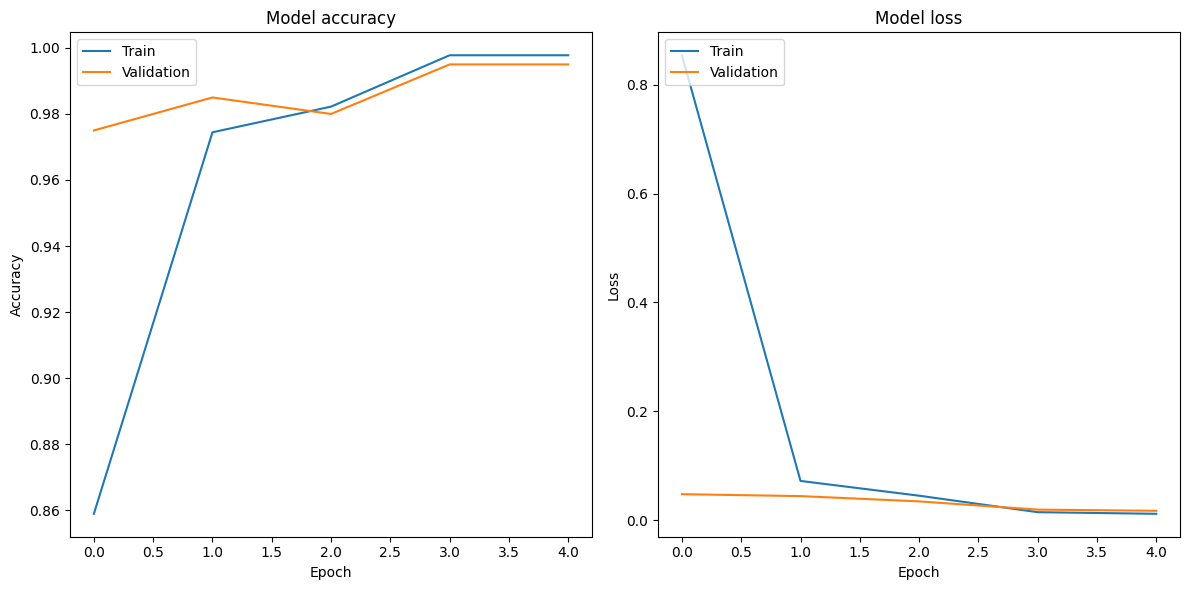

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Path to the dataset folders in Google Drive
dataset_path = '/content/drive/MyDrive/HealthyPotato.v1i.multiclass'

# Load CSV files
train_csv = pd.read_csv(os.path.join(dataset_path, 'train/train.csv'))
test_csv = pd.read_csv(os.path.join(dataset_path, 'test/test.csv'))
valid_csv = pd.read_csv(os.path.join(dataset_path, 'valid/valid.csv'))

# Combine the labels into a single column
train_csv['label'] = train_csv.apply(lambda row: 'disease' if row[' Potato___disease'] == 1 else 'healthy', axis=1)
valid_csv['label'] = valid_csv.apply(lambda row: 'disease' if row[' Potato___disease'] == 1 else 'healthy', axis=1)

# Access image files
train_images_path = os.path.join(dataset_path, 'train/')
test_images_path = os.path.join(dataset_path, 'test/')
valid_images_path = os.path.join(dataset_path, 'valid/')

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Flow from dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_csv,
    directory=train_images_path,
    x_col='filename',
    y_col='label',
    target_size=(640, 640),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_csv,
    directory=valid_images_path,
    x_col='filename',
    y_col='label',
    target_size=(640, 640),
    batch_size=32,
    class_mode='categorical'
)

# Define the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(640, 640, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator
)

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [6]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload an image file from your local machine
uploaded = files.upload()

# Assuming the uploaded file is named 'uploaded_image.jpg'
image_path = next(iter(uploaded))

# Load and preprocess the image
img = image.load_img(image_path, target_size=(640, 640))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale the image as the model was trained on rescaled images

# Make a prediction
prediction = model.predict(img_array)

# Convert the prediction to a class label
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Label map
labels = train_generator.class_indices
labels = dict((v, k) for k, v in labels.items())

# Map the predicted class index to the original label
predicted_label = labels[predicted_class_index]

# Display the result
print(f"The predicted label for the uploaded image is: {predicted_label}")

Saving 9125d133-5b86-4363-8fbe-79c813ac8795___RS_Early.B 6748.JPG to 9125d133-5b86-4363-8fbe-79c813ac8795___RS_Early.B 6748.JPG
1/1 [==============================] - 0s 150ms/step
The predicted label for the uploaded image is: disease
